# Hybrid Deep Learning

### Artificial Neural Networks & Self Organising Maps

#### Credit Card Fraud Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Part 1 - Data Preprocessing

### Data Loading

In [2]:
PATH = "../../../Deep_Learning_Extended/Self_Organizing_Maps/Credit_Card_Applications.csv"

In [3]:
dataset = pd.read_csv(PATH)

In [4]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [5]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

### Feature Scaling

In [6]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler(feature_range=(0, 1))
X = sc.fit_transform(X)

## Part 2 - SOM

In [7]:
import sys
DIRECTORY = "../../../Deep_Learning_Extended/Self_Organizing_Maps/"
sys.path.append(DIRECTORY)

In [8]:
from minisom import MiniSom

grid = (10, 10)
som = MiniSom(grid[0], grid[1], input_len=len(X[0]), 
              sigma=1.0, learning_rate=0.5, random_seed=42)

In [9]:
num_iteration = 100

som.random_weights_init(X)
som.train_random(X, num_iteration=num_iteration)

## Part 3 - Model Evaluation

### Map Visualisation

In [10]:
from pylab import bone, pcolor, colorbar, plot, show

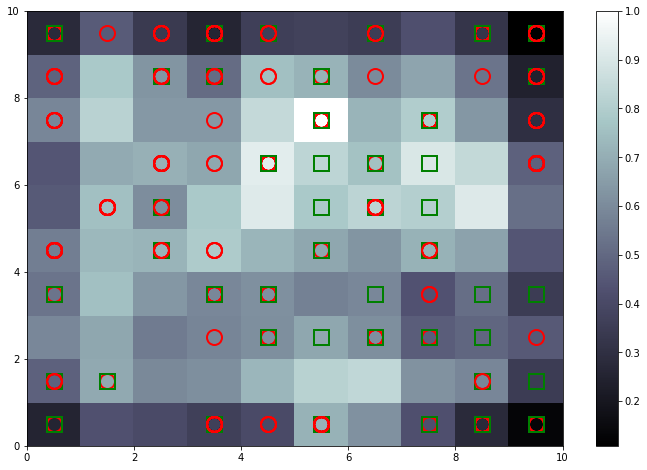

In [11]:
plt.figure(figsize=(12, 8))
bone()
pcolor(som.distance_map().T)
colorbar()

markers = ['o', 's']
marker_colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5, w[1] + 0.5, marker=markers[y[i]], 
         markeredgecolor=marker_colors[y[i]], 
         markerfacecolor='None', markersize=15, 
         markeredgewidth=2)

### Finding Frauds

In [12]:
mappings = som.win_map(X)

In [13]:
som_map = som.distance_map()

threshold = 0.9
lf_coordinates = []

for row in range(grid[0]):
    for col in range(grid[1]):
        if som_map[row][col] > threshold:
            lf_coordinates.append((row, col))

In [14]:
frauds = []
for coordinate in lf_coordinates:
    frauds = frauds + (mappings[coordinate])

In [15]:
frauds = sc.inverse_transform(frauds)
frauds_df = pd.DataFrame(frauds, columns=dataset.columns[:-1])
frauds_df.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14
0,15786237.0,0.0,19.17,0.585,1.0,6.0,4.0,0.585,1.0,0.0,0.0,1.0,2.0,160.0,1.0
1,15590434.0,0.0,25.00,0.875,2.0,14.0,8.0,1.040,1.0,0.0,0.0,1.0,2.0,160.0,5861.0
2,15767358.0,0.0,49.83,13.585,2.0,4.0,8.0,8.500,1.0,0.0,0.0,1.0,2.0,0.0,1.0
3,15671014.0,0.0,25.33,2.085,2.0,8.0,8.0,2.750,1.0,0.0,0.0,1.0,2.0,360.0,2.0
4,15642336.0,0.0,57.08,0.335,2.0,3.0,5.0,1.000,1.0,0.0,0.0,1.0,2.0,252.0,2198.0


## Part 4 - Feature Creation

In [16]:
customers = dataset.iloc[:, 1:].values

In [17]:
is_fraud = np.zeros(len(customers))
for i, customer in enumerate(dataset.values):
    customer_id = customer[0]
    if customer_id in frauds[:, 0]:
        is_fraud[i] = 1

## Part 5 - ANN

### Feature Scaling

In [18]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
customers = sc.fit_transform(customers)

### Model

In [19]:
customers.shape

(690, 15)

In [20]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tf.random.set_seed(42)

ann = Sequential()
ann.add(Dense(2, activation='relu', input_shape=(15, )))
ann.add(Dense(1, activation='sigmoid'))

ann.compile(optimizer='adam', loss='binary_crossentropy', 
            metrics=['accuracy'])

In [21]:
epochs = 10
batch_size = 1
ann.fit(customers, is_fraud, batch_size=batch_size , epochs=epochs)

Train on 690 samples
Epoch 1/10
690/690 [==============================] - 1s 2ms/sample - loss: 0.6013 - accuracy: 0.7855
Epoch 2/10
690/690 [==============================] - 1s 1ms/sample - loss: 0.3447 - accuracy: 0.9493
Epoch 3/10
690/690 [==============================] - 1s 1ms/sample - loss: 0.2483 - accuracy: 0.9493
Epoch 4/10
690/690 [==============================] - 1s 1ms/sample - loss: 0.2028 - accuracy: 0.9493
Epoch 5/10
690/690 [==============================] - 1s 1ms/sample - loss: 0.1706 - accuracy: 0.9493
Epoch 6/10
690/690 [==============================] - 1s 1ms/sample - loss: 0.1410 - accuracy: 0.9493
Epoch 7/10
690/690 [==============================] - 1s 1ms/sample - loss: 0.1100 - accuracy: 0.9609
Epoch 8/10
690/690 [==============================] - 1s 1ms/sample - loss: 0.0858 - accuracy: 0.9710
Epoch 9/10
690/690 [==============================] - 1s 1ms/sample - loss: 0.0685 - accuracy: 0.9797
Epoch 10/10
690/690 [==============================] - 1s 1ms

### History

In [22]:
history = ann.history.history
loss = history['loss']
accuracy = history['accuracy']

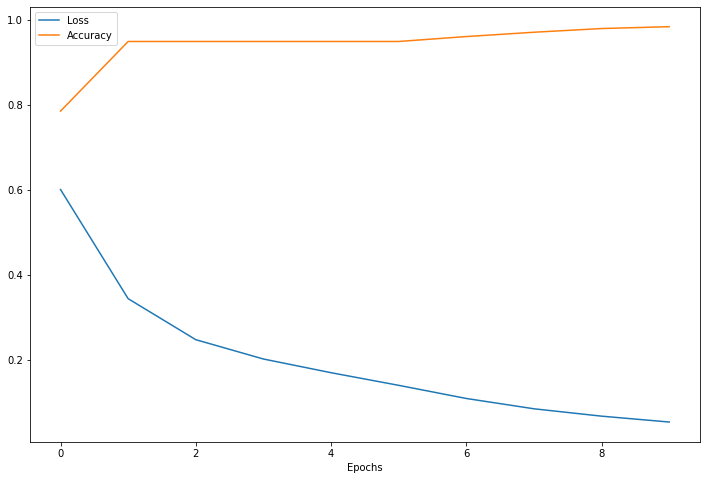

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
plt.plot(loss, label='Loss')
plt.plot(accuracy, label='Accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.show()

### Prediction

In [24]:
y_pred_prob = ann.predict(customers)
y_pred_prob = np.concatenate([dataset.iloc[:, 0:1], y_pred_prob], axis=1)

In [25]:
np.set_printoptions(suppress=True)
y_pred_prob = y_pred_prob[y_pred_prob[:, 1].argsort()]

In [26]:
y_pred = ann.predict_classes(customers)
print(np.concatenate((is_fraud.reshape(len(y_pred),1), y_pred.reshape(len(y_pred),1)), axis=1))

[[0. 0.]
 [0. 0.]
 [0. 0.]
 ...
 [1. 1.]
 [0. 0.]
 [0. 0.]]


### Confusion Matrix

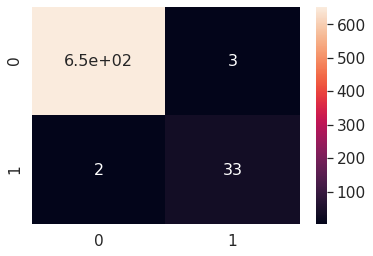

In [27]:
import seaborn as sn
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(is_fraud, y_pred)
df_cm = pd.DataFrame(cm, range(len(cm[0])), range(len(cm[0])))
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})
plt.show()

### Accuracy Score

In [28]:
from sklearn.metrics import accuracy_score

accuracy_score(is_fraud, y_pred)

0.9927536231884058